In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import csv
import dateutil.relativedelta
import matplotlib.pyplot as plt; plt.rcdefaults()
plt.rcParams ['axes.facecolor'] = 'black' 
plt.rc('font', family='arial')
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.formula.api as sm

In [2]:
df = pd.read_pickle("final_memes.pkl")

In [3]:
np.mean(df['Half_Life'])
df[df['year']==2019]['Half_Life']
df['Peak_Date'].iloc[0].year
np.mean(df[df['year']==2019]['fHalf_Life'])
df[df['year']==2019]['fHalf_Life']

4        1.0
15      16.0
16       1.0
18       1.0
23       1.0
        ... 
1745     1.0
1849     2.0
2224     1.0
2515     3.0
2523     4.0
Name: fHalf_Life, Length: 128, dtype: float64

In [4]:
df.loc[df['Half_Life']==max(df['Half_Life'])]

,Peak_Date,Title,Half_Life,fHalf_Life,fPeak_Date,year,Ordinal_Peak
2596,2012-01-07,no u,136 days,136.0,734509,2012,2925


In [5]:
temp = df[df['fHalf_Life']>14]

In [8]:
temp[temp['year']==2019]['fHalf_Life']
np.std(temp[temp['year']==2019]['fHalf_Life'], ddof=1) / np.sqrt(len(temp[temp['year']==2019]['fHalf_Life']))

6.193039762232974

In [9]:
eList = []
yerr = []
size = []
for x in range(2011,2021):
    data = df[df['year']==x]['fHalf_Life']
    eList.append(data.mean())
    yerr.append(np.std(data, ddof=1) / np.sqrt(len(data)))
    size.append(len(data))

In [10]:
size

[207, 296, 199, 160, 194, 195, 203, 144, 128, 123]

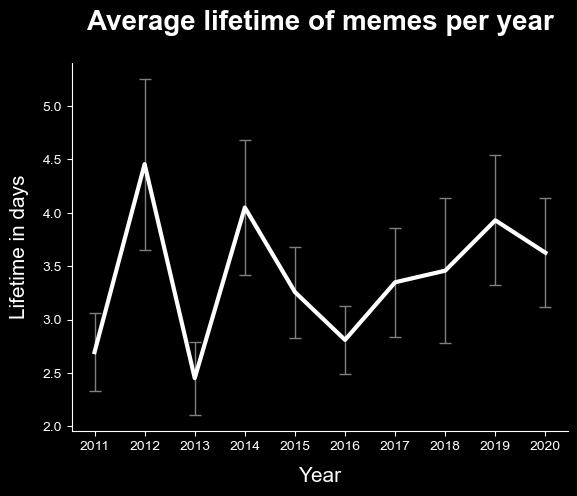

In [15]:
fig, ax = plt.subplots()
#l = ax.fill_between(x,eList, linewidth=5)
ax.errorbar(x, eList,
            yerr,
            capsize=4,color = 'grey',linewidth =1,zorder=1)
ax.plot(eList,linewidth=3,color='white',zorder=2)
ax.set_ylabel('Lifetime in days',labelpad=10,color='white')
ax.set_xlabel('Year',labelpad=10,color='white')
ax.set_title('Average lifetime of memes per year',pad=23,color='white',size=20)

xlab = ax.xaxis.get_label()
ylab = ax.yaxis.get_label()
ax.set_facecolor("black")
fig.set_facecolor("black")
#xlab.set_style('italic')
xlab.set_size(15)
#ylab.set_style('italic')
ylab.set_size(15)
ylab.set_size(15)
# tweak the title
ttl = ax.title
ttl.set_weight('bold')

#ax.grid('on')

#l.set_facecolor("#A9A9A9")
#l.set_alpha(.4)

#ax.set_ylim(5,21)
#ax.set_xlim(0-.3,len(x)-.9)

#t = ax.set_yticks(np.arange(5,20,2.0))
ax.spines['left'].set_color("white")
ax.spines['bottom'].set_color("white")
ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to red
ax.tick_params(axis='y', colors='white')
 
#pad = plt.text(0,23.5,'pad')

In [16]:
stats.ttest_ind(df[df['year']==2019]['fHalf_Life'], df[df['year']==2018]['fHalf_Life'])

Ttest_indResult(statistic=0.5108922236952854, pvalue=0.6098440055151129)

<AxesSubplot:title={'center':'fHalf_Life'}, xlabel='year'>

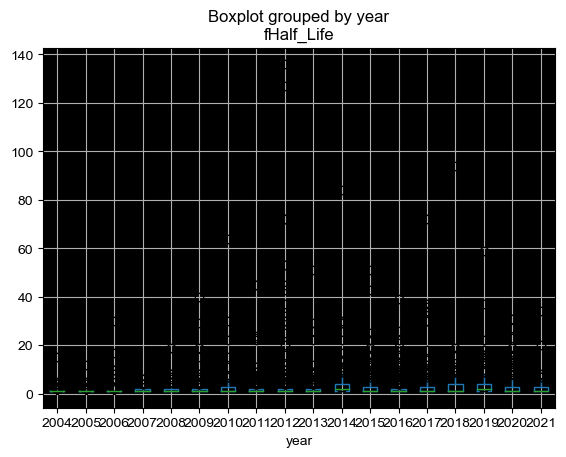

In [17]:
df.boxplot('fHalf_Life', by='year') #boxplot for the data. It doesn't work for this kind of data, but I thought it is worth leaving this up here.

In [60]:
reg = LinearRegression().fit(x,temp['fHalf_Life'])

In [58]:
x = np.array(temp['Ordinal_Peak']).reshape(-1,1)

In [61]:
pred = reg.predict(x)

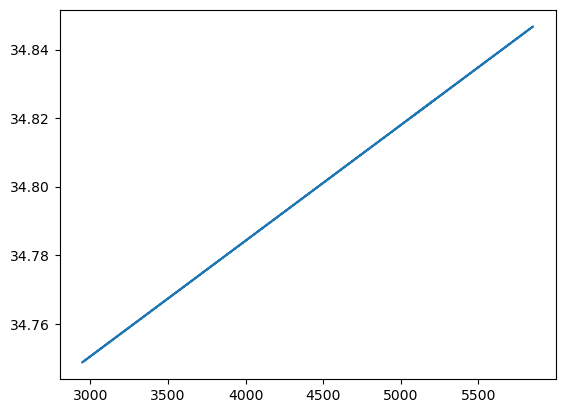

In [62]:
plt.plot(x,pred)

In [18]:
stats.stats.pearsonr(temp['Ordinal_Peak'],temp['fHalf_Life'])

(-0.11463586427239023, 0.30511742447746165)

In [53]:
temp = temp[temp['year']>2012]

In [10]:
df

,Peak_Date,Title,Half_Life,fHalf_Life,fPeak_Date,year,Ordinal_Peak
0,2018-01-07,mcdonalds alignment chart meme,14 days,14.0,736701,2018,4760
1,2019-04-14,old town road meme,21 days,21.0,737163,2019,5222
2,2018-11-11,surprised pikachu meme,7 days,7.0,737009,2018,5068
3,2018-11-04,epic handshake meme,7 days,7.0,737002,2018,5061
4,2019-09-08,potion seller meme,7 days,7.0,737310,2019,5369
...,...,...,...,...,...,...,...
1662,2011-12-04,tron guy meme,7 days,7.0,734475,2011,2534
1663,2018-11-25,one take meme,28 days,28.0,737023,2018,5082
1664,2007-12-30,2 girls 1 cup meme,7 days,7.0,733040,2007,1099
1665,2010-08-22,advice dog meme,7 days,7.0,734006,2010,2065


(0.0, 21.0)

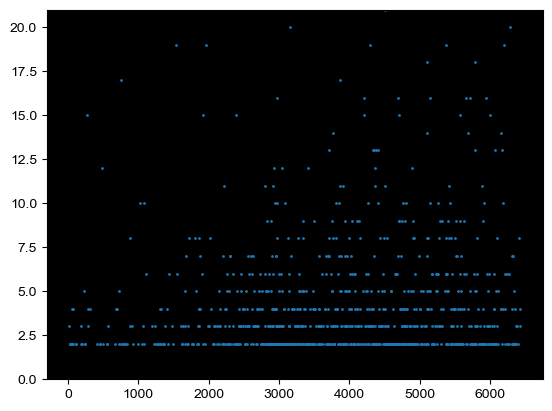

In [58]:
fig, ax = plt.subplots()
#ax.plot_date(df['Peak_Date'].to_numpy(),df['Half_Life'],color='white',s=1)
ax.scatter(df['Ordinal_Peak'][df.fHalf_Life>1],df['fHalf_Life'][df.fHalf_Life>1],s=1)
ax.set_ylim(0,21)

In [23]:
 def dt64_to_float(dt64):
...     year = dt64.astype('M8[Y]')
...     days = (dt64 - year).astype('timedelta64[D]')
...     year_next = year + np.timedelta64(1, 'Y')
...     days_of_year = (year_next.astype('M8[D]') - year.astype('M8[D]')).astype('timedelta64[D]')
...     dt_float = 1970 + year.astype(float) + days / (days_of_year)
...     return dt_float

In [35]:
df['Peak_Date'].to_numpy()

array([datetime.date(2018, 7, 1), datetime.date(2018, 2, 15),
       datetime.date(2020, 8, 20), ..., datetime.date(2012, 2, 10),
       datetime.date(2006, 4, 5), datetime.date(2009, 2, 7)], dtype=object)

In [52]:
df['fHalf_Life']>1

0       False
1       False
2       False
3       False
4       False
        ...  
2651    False
2652    False
2653     True
2654    False
2655     True
Name: fHalf_Life, Length: 2656, dtype: bool